In [120]:
# needed packages
import cv2 
import numpy as np
import pandas as pd
import easyocr
import imutils
import matplotlib.pyplot as plt

In [133]:
# Read the image
#image = cv2.imread("OIP (1).jfif")
image = cv2.imread("OIP.jfif")

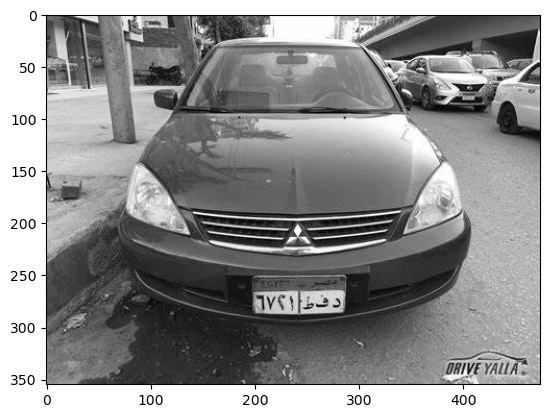

In [134]:
# Convert image to gray
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray_image,cv2.COLOR_BGR2RGB)) # Matplotlib works with RGB 

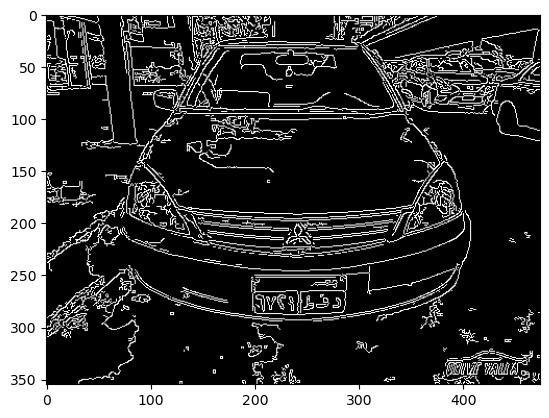

In [135]:
bfilter = cv2.bilateralFilter(gray_image,11,11,17) # Reduce Noise and Smooth image
edges = cv2.Canny(bfilter,30,200) # Detect edges
plt.imshow(cv2.cvtColor(edges,cv2.COLOR_BGR2RGB))

In [149]:
key_points = cv2.findContours(edges.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(key_points)
contours = sorted(contourss,key=cv2.contourArea,reverse=True)[:8]
len(contours)

8

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4: 
        location = approx
        break
len(location)        

In [148]:
print(location)

None


In [144]:
mask = np.zeros(gray_image.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(image,image,mask = mask)

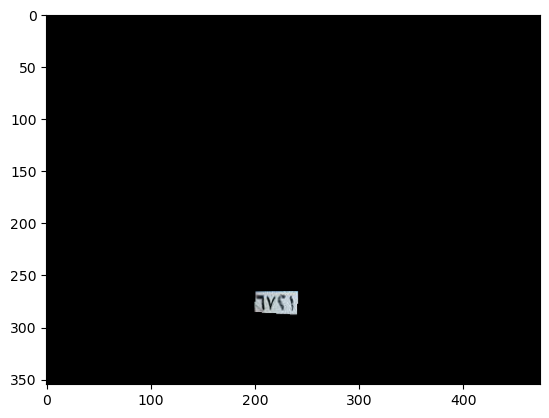

In [145]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [129]:
(x,y) = np.where(mask == 255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))

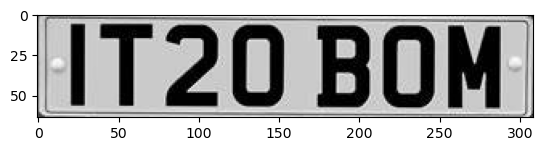

In [130]:
cropped_image = gray_image[x1:x2+1 , y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [131]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\sobhy\AppData\Local\anaconda3\Lib\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub

[([[4, 0], [300, 0], [300, 64], [4, 64]], 'IT20 BOM', 0.34626613086034336)]

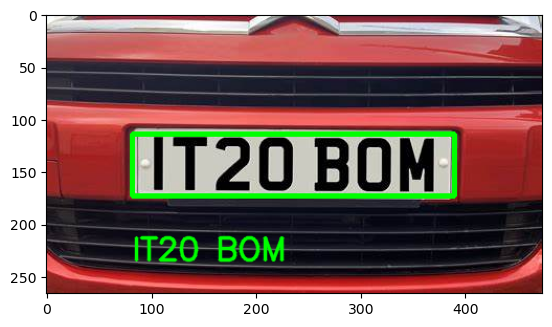

In [132]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(image , text = text , org = (approx[0][0][0],approx[1][0][1]+60),fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(image, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))